<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 03. A Convolutional Image Classification Neural Network


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will train a neural network to classify images.

---

---

## The Dataset

We will use two sets of synthetic images to train and to test a neural network. The training set includes 5000 synthetic images with a size of 28pixels by 28 pixels, showing the solar disk and a random number of 'sunspots' and also includes a set of targets with the number of spots in each image. The test set includes 1000 of images with the corresponding targets. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


train_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/03. Image Classification NN/star_data/star_image_train.npy")
train_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/03. Image Classification NN/star_data/star_label_train.npy")

test_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/03. Image Classification NN/star_data/star_image_test.npy")
test_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/03. Image Classification NN/star_data/star_label_test.npy")

In [3]:
print(train_images.shape)
print(train_labels.shape)

(5000, 28, 28)
(5000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(1000, 28, 28)
(1000,)


These images are already 'normalized', i.e. the entries in the array are numbers in the range [0,1],

In [5]:
train_images[15]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We can visualize some of the images in the trining set,

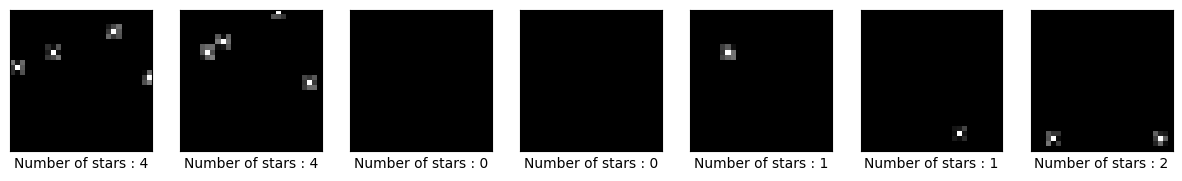

In [6]:
fig, ax = plt.subplots(1,7, figsize=(15,7))

for i in range(7):    
    ax[i].imshow(train_images[i+5], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f'Number of stars : {train_labels[i+5]:.0f}')
plt.show()

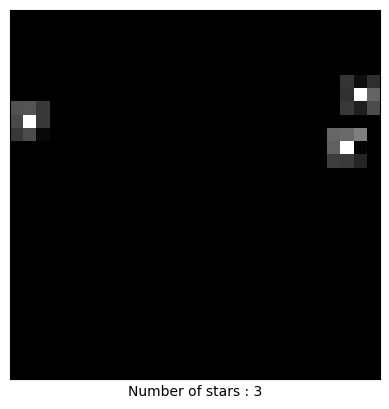

In [7]:
def showImage(x,y,item):
  plt.figure()
  plt.imshow(x[item], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'Number of stars : {y[item]:.0f}')
  plt.show()


showImage(train_images, train_labels, 2557)

## The Convolutional Classification Neural Network

We want to train a convolutional neural network model that reads the data and classify these images according to the number of stars. 






In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (2, 2), padding = "same", strides=1, 
                                 activation='relu', input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(64, (2, 2), padding = "same", strides=1,
                                 activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(64, (2, 2), padding = "same", strides=1,
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))


In order to compile the neural network we will include the [ADAM](https://keras.io/api/optimizers/adam/) optimizer, the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) loss function and the [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# print model summary before training
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        16448     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                      

Now we will train the model using the train-sets and 20 epochs.

In [16]:
history = model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
157/157 [==============================] - 38s 227ms/step - loss: 1.4567 - accuracy: 0.4218
Epoch 2/9
157/157 [==============================] - 34s 218ms/step - loss: 0.8884 - accuracy: 0.6480
Epoch 3/9
157/157 [==============================] - 33s 213ms/step - loss: 0.6099 - accuracy: 0.7552
Epoch 4/9
157/157 [==============================] - 36s 227ms/step - loss: 0.4797 - accuracy: 0.8068
Epoch 5/9
157/157 [==============================] - 33s 213ms/step - loss: 0.3717 - accuracy: 0.8486
Epoch 6/9
157/157 [==============================] - 33s 213ms/step - loss: 0.2996 - accuracy: 0.8824
Epoch 7/9
157/157 [==============================] - 36s 227ms/step - loss: 0.2373 - accuracy: 0.9050
Epoch 8/9
157/157 [==============================] - 33s 213ms/step - loss: 0.1990 - accuracy: 0.9224
Epoch 9/9
157/157 [==============================] - 33s 213ms/step - loss: 0.1537 - accuracy: 0.9478


---
## Testing the Model

Now we will use the test subsets to probe the model. Using the '.evaluate()' method, we obtain the accuracy of the model (using the metric defined above),

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 1s - loss: 0.9777 - accuracy: 0.7060 - 1s/epoch - 41ms/step

Test accuracy: 0.7059999704360962


Note that the trained model have an accuracy of just 0.5 on the test set.

Using the '.predict()' method we will obtain the predictions for the test set,

In [18]:
predictions = model.predict(test_images)

32/32 [==============================] - 2s 69ms/step


---
## Visualization of the Results

In order to visualize the result of the mode, we define two plotting functions. The first one shows the image together with the predicted value. The second one shows the probabilities of all the targets for the given sample.

In [36]:
def plot_image(i, p=predictions, tar = test_labels, image = test_images):
  target, img = tar[i], image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

  pred_target = np.argmax(p[i])
  if pred_target == target:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} ({:2.0f}%)   True:{}".format(pred_target,
                                100*np.max(p),
                                target),
                                color=color)


def plot_value_array(i, p=predictions, tar = test_labels):
  target = tar[i]
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), p[i], color="#777777")
  plt.ylim([0, 1])
  pred_target = np.argmax(p[i])

  thisplot[pred_target].set_color('red')
  thisplot[target].set_color('blue')

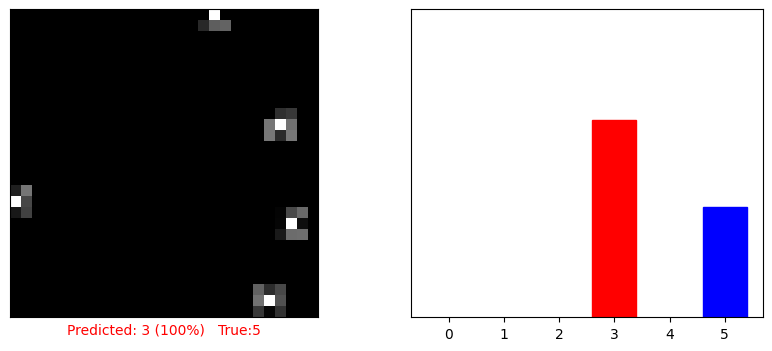

In [55]:
i = int(np.random.rand(1)*len(test_labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i)
plt.subplot(1,2,2)
plot_value_array(i)
plt.show()
